In [50]:
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt

data=pd.read_csv("./data/csv/owid-covid-data.csv")
data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
0,ABW,North America,Aruba,2020-03-13,2.0,2.0,NaN,0.0,0.0,NaN,18.733,18.733,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.00,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
1,ABW,North America,Aruba,2020-03-19,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
2,ABW,North America,Aruba,2020-03-20,4.0,2.0,0.286,0.0,0.0,0.0,37.465,18.733,2.676,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,33.33,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
3,ABW,North America,Aruba,2020-03-21,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29
4,ABW,North America,Aruba,2020-03-22,NaN,NaN,0.286,NaN,NaN,0.0,NaN,NaN,2.676,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44.44,106766.0,584.8,41.2,13.085,7.452,35973.781,NaN,NaN,11.62,NaN,NaN,NaN,NaN,76.29


In [6]:
data.columns

Index(['iso_code', 'continent', 'location', 'date', 'total_cases', 'new_cases',
       'new_cases_smoothed', 'total_deaths', 'new_deaths',
       'new_deaths_smoothed', 'total_cases_per_million',
       'new_cases_per_million', 'new_cases_smoothed_per_million',
       'total_deaths_per_million', 'new_deaths_per_million',
       'new_deaths_smoothed_per_million', 'new_tests', 'total_tests',
       'total_tests_per_thousand', 'new_tests_per_thousand',
       'new_tests_smoothed', 'new_tests_smoothed_per_thousand',
       'tests_per_case', 'positive_rate', 'tests_units', 'stringency_index',
       'population', 'population_density', 'median_age', 'aged_65_older',
       'aged_70_older', 'gdp_per_capita', 'extreme_poverty',
       'cardiovasc_death_rate', 'diabetes_prevalence', 'female_smokers',
       'male_smokers', 'handwashing_facilities', 'hospital_beds_per_thousand',
       'life_expectancy'],
      dtype='object')

In [3]:
kenya_data=data[data["location"]=="Kenya"]
kenya_data

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,total_cases_per_million,new_cases_per_million,new_cases_smoothed_per_million,total_deaths_per_million,new_deaths_per_million,new_deaths_smoothed_per_million,new_tests,total_tests,total_tests_per_thousand,new_tests_per_thousand,new_tests_smoothed,new_tests_smoothed_per_thousand,tests_per_case,positive_rate,tests_units,stringency_index,population,population_density,median_age,aged_65_older,aged_70_older,gdp_per_capita,extreme_poverty,cardiovasc_death_rate,diabetes_prevalence,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy
19719,KEN,Africa,Kenya,2020-03-06,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,31.0,0.001,NaN,NaN,NaN,NaN,NaN,samples tested,13.89,53771300.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7
19720,KEN,Africa,Kenya,2020-03-07,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,samples tested,13.89,53771300.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7
19721,KEN,Africa,Kenya,2020-03-08,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,samples tested,13.89,53771300.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7
19722,KEN,Africa,Kenya,2020-03-09,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,samples tested,13.89,53771300.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7
19723,KEN,Africa,Kenya,2020-03-10,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,samples tested,13.89,53771300.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19890,KEN,Africa,Kenya,2020-08-24,32364.0,246.0,320.571,548.0,6.0,10.571,601.882,4.575,5.962,10.191,0.112,0.197,3381.0,425364.0,7.911,0.063,4400.0,0.082,13.725,0.073,samples tested,NaN,53771300.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7
19891,KEN,Africa,Kenya,2020-08-25,32557.0,193.0,313.143,554.0,6.0,10.286,605.472,3.589,5.824,10.303,0.112,0.191,4149.0,429513.0,7.988,0.077,4418.0,0.082,14.109,0.071,samples tested,NaN,53771300.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7
19892,KEN,Africa,Kenya,2020-08-26,32803.0,246.0,309.571,559.0,5.0,10.286,610.047,4.575,5.757,10.396,0.093,0.191,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53771300.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7
19893,KEN,Africa,Kenya,2020-08-27,33016.0,213.0,285.857,564.0,5.0,8.286,614.008,3.961,5.316,10.489,0.093,0.154,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,53771300.0,87.324,20.0,2.686,1.528,2993.028,36.8,218.637,2.92,1.2,20.4,24.651,1.4,66.7


Total Cases

In [ ]:
kenya_data["total_cases"].plot(kind="line")

New cases

<AxesSubplot:>

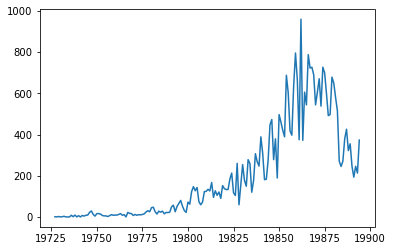

In [4]:
kenya_data["new_cases"].plot(kind="line")

Deaths

<AxesSubplot:>

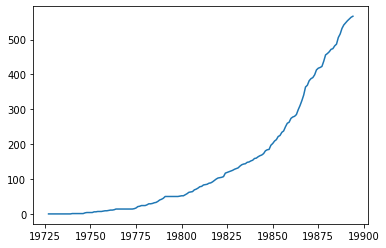

In [5]:
kenya_data["total_deaths"].plot(kind="line")

More refined data

In [38]:
import json
new_data=pd.read_json("./data/json/covid-timeseries.json")
kenya_data=new_data["Kenya"]
kenya_data=kenya_data.apply(pd.Series)
kenya_data

,date,confirmed,deaths,recovered
0,2020-1-22,0,0,0
1,2020-1-23,0,0,0
2,2020-1-24,0,0,0
3,2020-1-25,0,0,0
4,2020-1-26,0,0,0
...,...,...,...,...
214,2020-8-23,32364,548,18670
215,2020-8-24,32557,554,18895
216,2020-8-25,32803,559,19055
217,2020-8-26,33016,564,19296


In [46]:
kenya_data["active"]=kenya_data["confirmed"]-(kenya_data["recovered"]+kenya_data["deaths"])

<AxesSubplot:>

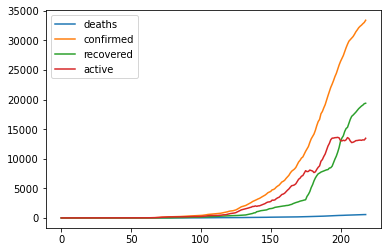

In [47]:
kenya_data[["deaths","confirmed","recovered","active"]].plot(kind="line")

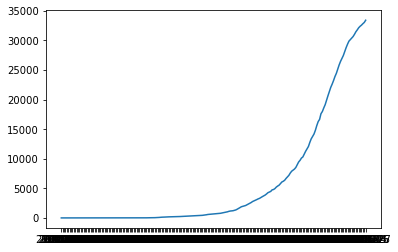

In [57]:
plt.plot(kenya_data["date"],kenya_data["confirmed"])